### 6.1

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.basemap import Basemap

In [35]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


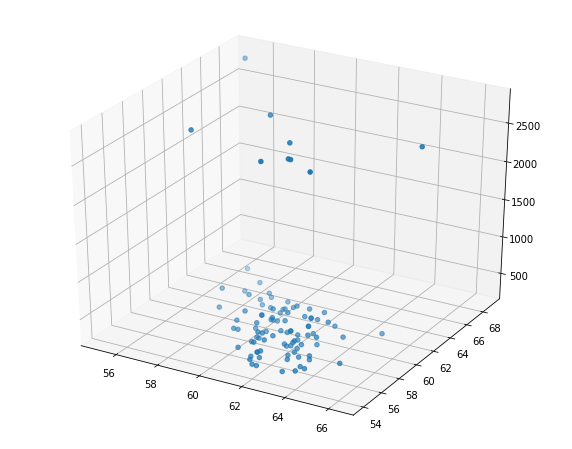

In [36]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[:99].depth,df[:99].table,df[:99].price)
plt.show()

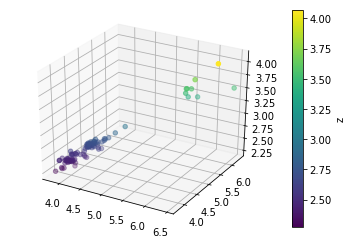

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(df[:99].x,df[:99].y,df[:99].z,c=df[:99].z)
cbar=plt.colorbar(pnt3d)
cbar.set_label("z")
plt.show()

### 6.2

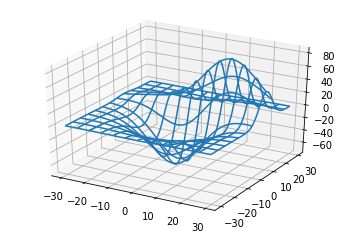

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y, Z = axes3d.get_test_data(0.05)

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [39]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

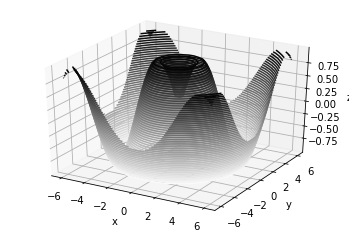

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

### 6.3

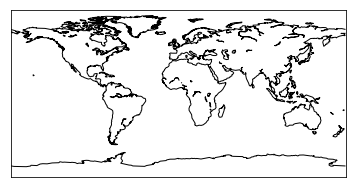

In [41]:
from mpl_toolkits.basemap import Basemap

map = Basemap()

map.drawcoastlines()

plt.show()

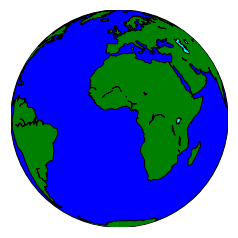

In [42]:
# Create a globe map
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='blue')

#Fill the continents with the land color
map.fillcontinents(color='green',lake_color='aqua')

map.drawcoastlines()

plt.show()

### 6.4

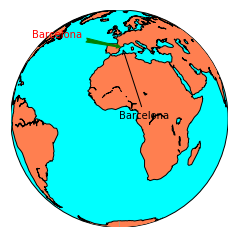

In [44]:
map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


x, y = map(2, 41)
x2, y2 = (-90, 10)

plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                color='r',
                arrowprops=dict(arrowstyle="fancy", color='g')
                )

x2, y2 = map(0, 0)
plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->")
                )
plt.show()

### 6.5

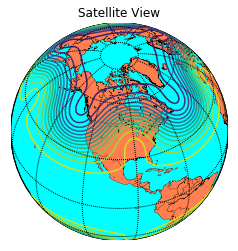

In [45]:
# Map
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')

map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')

map.drawmapboundary(fill_color='aqua')

map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# Data
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)

# Plot
x, y = map(lons*180./np.pi, lats*180./np.pi)

cs = map.contour(x,y,wave+mean,15,linewidths=1.5)

plt.title('Satellite View')

plt.show()